In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt



In [8]:
#reg ex extract(r'(\w+)')

1
created stuff
created box
1
now plotting points


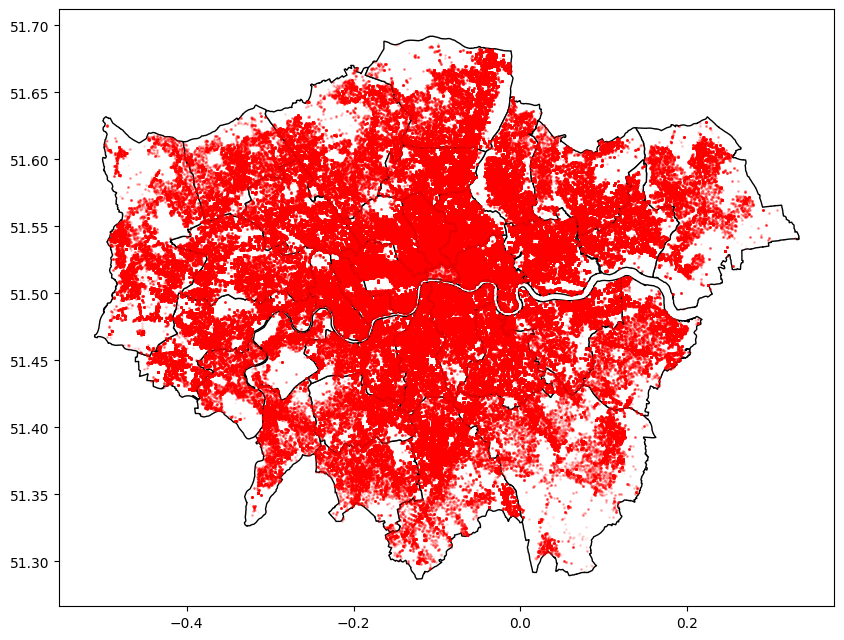

In [5]:
# Step 3: Load your data
# Assuming your CSV file has columns 'latitude' and 'longitude'
print("1")
df = pd.read_csv('merged-metropolitan-street.csv')

# Step 4: Create a GeoDataFrame
# Create a geometry column
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
london_boroughs = gpd.read_file('London_Borough_Excluding_MHW.shp')
london_boroughs = london_boroughs.to_crs(epsg=4326)
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
print("created stuff")

minx, miny, maxx, maxy = london_boroughs.total_bounds
gdf = gdf.cx[minx:maxx, miny:maxy]
print("created box")
gdf_within_london = gpd.overlay(gdf, london_boroughs, how='intersection')
print("1")


fig, ax = plt.subplots(figsize=(10, 10))
london_boroughs.plot(ax=ax, color='white', edgecolor='black')
print("now plotting points")
gdf_within_london.plot(ax=ax, color='red', markersize=1, alpha=0.05)
plt.show()

1
created stuff
created box
1
now plotting points


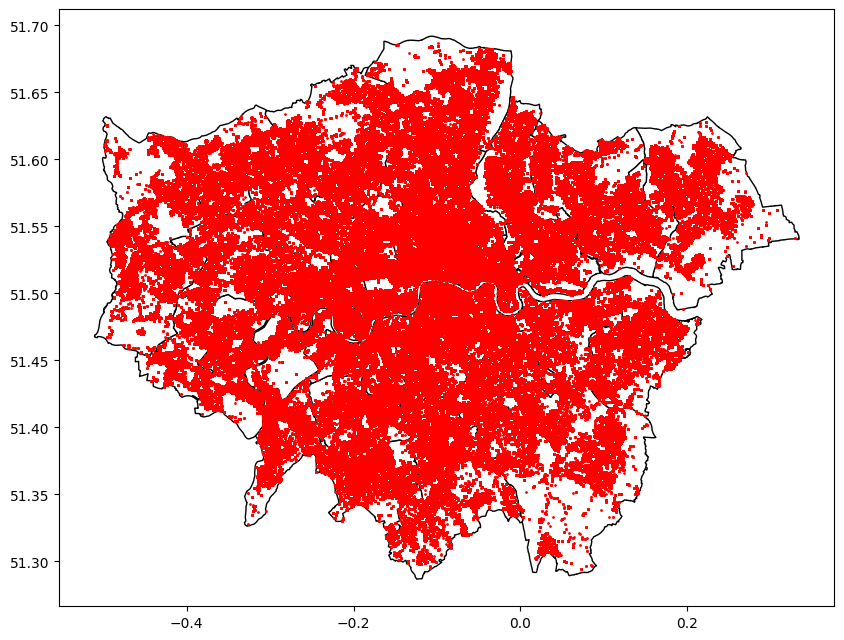

In [4]:
# Step 3: Load your data
# Assuming your CSV file has columns 'latitude' and 'longitude'
print("1")
df = pd.read_csv('merged-metropolitan-outcomes.csv')

# Step 4: Create a GeoDataFrame
# Create a geometry column
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
london_boroughs = gpd.read_file('London_Borough_Excluding_MHW.shp')
london_boroughs = london_boroughs.to_crs(epsg=4326)
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
print("created stuff")

minx, miny, maxx, maxy = london_boroughs.total_bounds
gdf = gdf.cx[minx:maxx, miny:maxy]
print("created box")
gdf_within_london = gpd.overlay(gdf, london_boroughs, how='intersection')
print("1")


fig, ax = plt.subplots(figsize=(10, 10))
london_boroughs.plot(ax=ax, color='white', edgecolor='black')
print("now plotting points")
#use regex to get the LSOA name form format NAME (CODE) extract NAME
gdf_within_london['Borough'] = gdf_within_london['LSOA name'].str.extract(r'(\w+)')
gdf_within_london.plot(ax=ax, color=gdf_within_london['Borough'], markersize=1)
plt.show()